# Problema 1 Llista 4

### CARGAR LOS DATOS

In [3]:
from apafib import load_BCN_vuelos
import pandas as pd
try:
    data = load_BCN_vuelos()
    data.index = pd.to_datetime(data.index)
    print(data)
except Exception as e:
    print(e)
    print("Error al cargar los datos")

            AeronavesPrat-Aeronaves  \
Dia                                   
2021-08-01                    729.0   
2021-08-02                    759.0   
2021-08-03                    650.0   
2021-08-04                    680.0   
2021-08-05                    674.0   
...                             ...   
2023-12-28                    887.0   
2023-12-29                    935.0   
2023-12-30                    826.0   
2023-12-31                    809.0   
2024-01-01                    855.0   

            Temperatura-Barcelona - Zona Universitària  Transito-Transito  \
Dia                                                                         
2021-08-01                                       21.80             1.4580   
2021-08-02                                       23.69             1.7111   
2021-08-03                                       25.04             1.7062   
2021-08-04                                       23.88             1.7139   
2021-08-05                    

In [35]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML, display

InteractiveShell.ast_node_interactivity = "all"
show_html = lambda html: display(HTML(html))

## Apartado A

In [4]:
data["day"] = data.index.day
data["dayofweek"] = data.index.dayofweek
data["weekofyear"] = data.index.isocalendar().week
data["month"] = data.index.month

data = data.reset_index(drop=True)
data.isna().sum()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AeronavesPrat-Aeronaves,884.0,786.138009,146.41058,323.0,684.5,809.5,908.0,1034.0
Temperatura-Barcelona - Zona Universitària,884.0,18.401114,6.247306,4.79,12.79,18.305,24.0625,32.88
Transito-Transito,884.0,1.814671,0.173299,1.3967,1.667775,1.8816,1.958475,2.1187
VisitantesMunicipales-Badalona,884.0,72863.041855,14498.227,37609.0,62843.25,72234.5,78219.0,106027.0
VisitantesMunicipales-L'Hospitalet de Llobregat,884.0,103065.215498,20074.314041,60441.0,87922.5,99447.5,112521.0,147522.0
VisitantesMunicipales-Sabadell,884.0,22677.270928,4380.826708,10437.0,19601.75,22862.5,25824.5,33615.0
VisitantesMunicipales-Santa Coloma de Gramenet,884.0,47229.390837,7886.82542,24534.0,42265.0,48149.5,53318.0,62202.0
VisitantesMunicipales-Terrassa,884.0,23431.143665,4220.113494,8821.0,20745.25,24361.5,26653.25,34081.0
VisitantesProvincia-Girona,884.0,30240.451357,8673.372123,11618.0,23791.0,30238.5,35576.75,53502.0
VisitantesProvincia-Illes Balears,884.0,10118.650452,3621.283056,3199.0,7352.0,9272.0,12599.5,21274.0


Obsevamos que nuestro conjunto de datos no tiene valores perdidos

Dividimos el conjunto de datos en conjunto de entrenamiento y conjunto de test (80%/20%)

In [5]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.2, random_state=42)

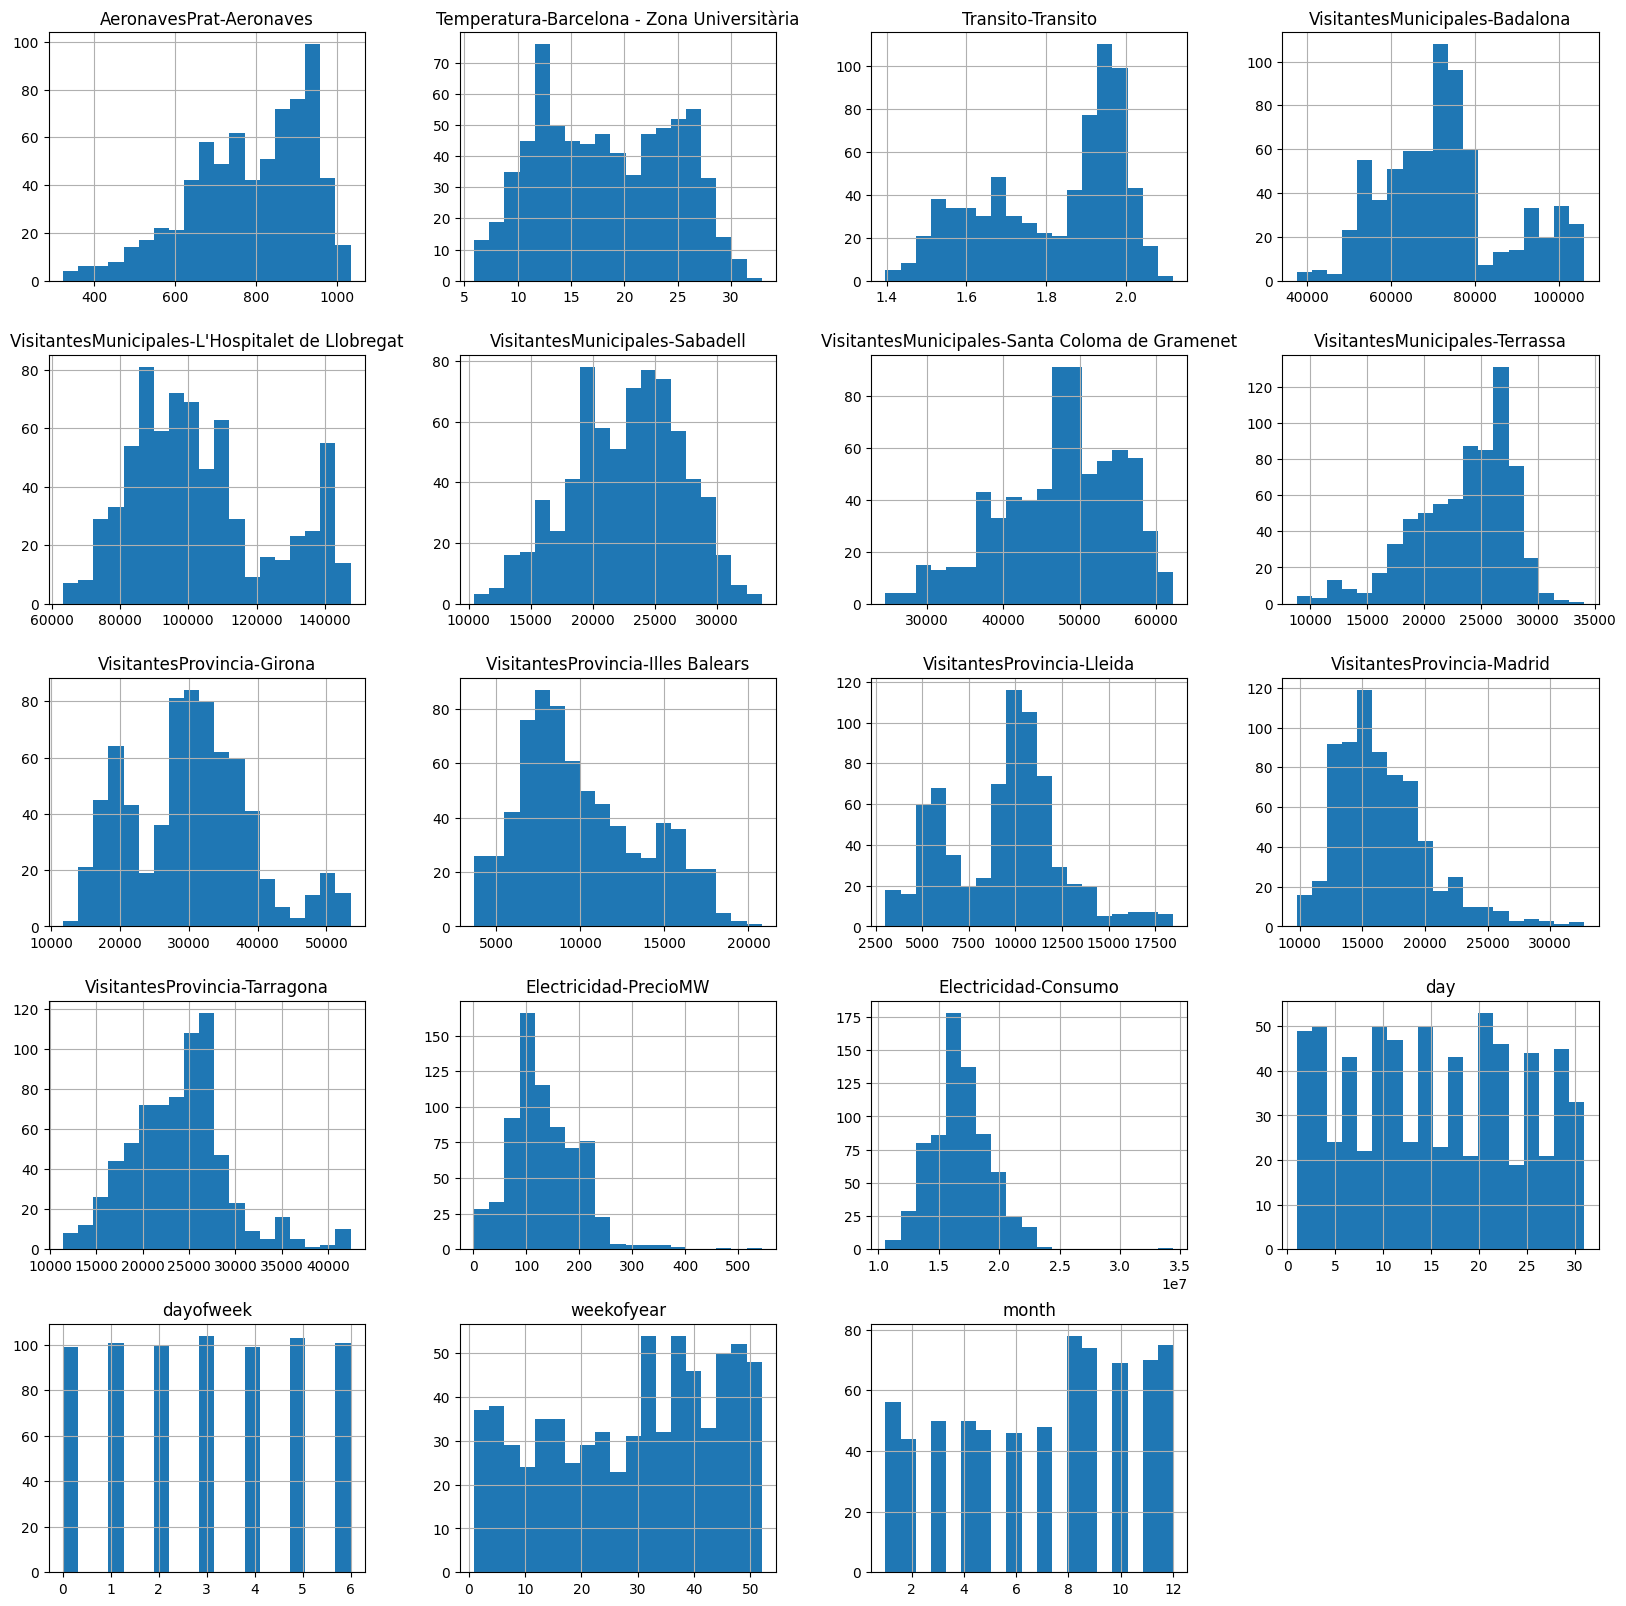

In [6]:
train.hist(bins=train.columns.size, figsize=(20, 20));

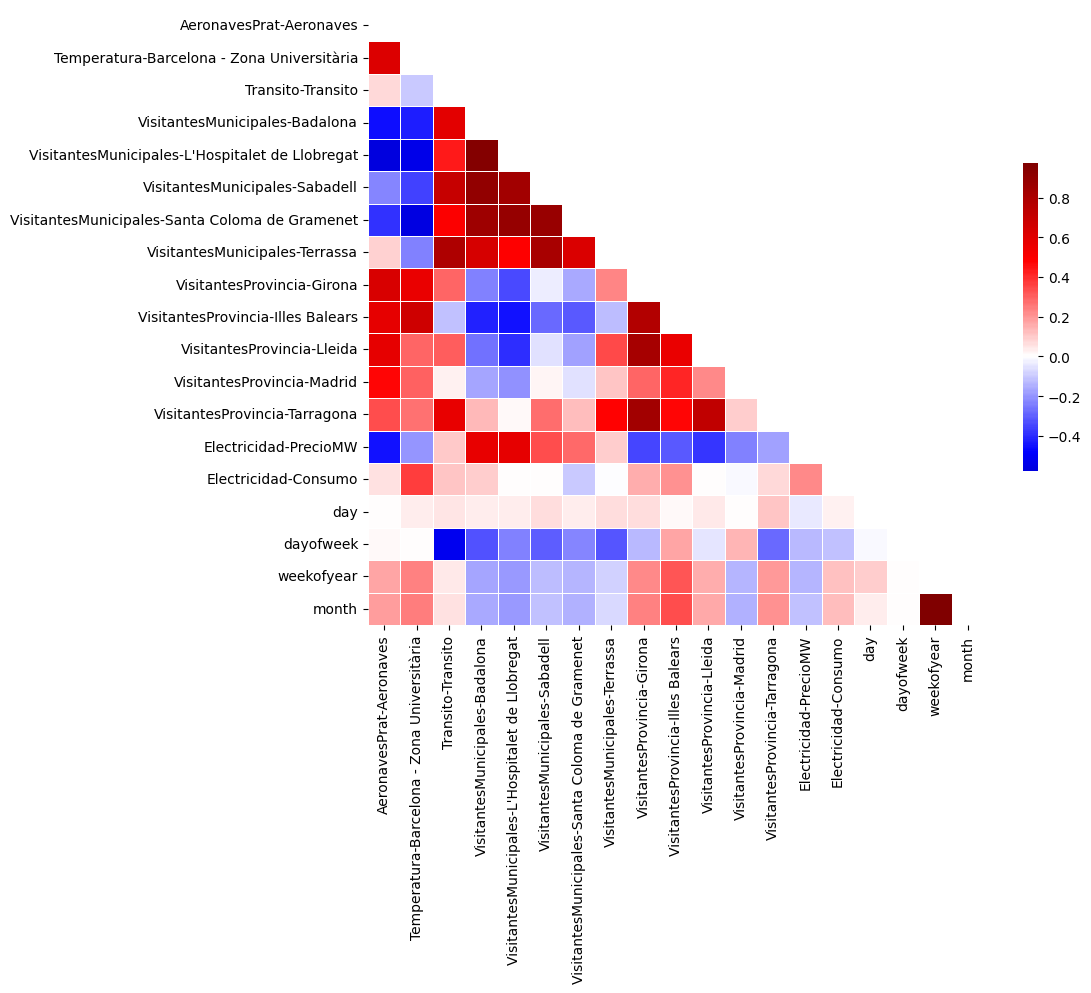

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = train.corr(numeric_only=False)
mask = np.triu(np.ones_like(corr))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

### PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


X_train = train.drop(columns=["AeronavesPrat-Aeronaves"])
y_train = train["AeronavesPrat-Aeronaves"]

In [9]:
myPCA = PCA().fit(X_train)

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[9.99859172e-01 1.13279101e-04 1.84665153e-05 2.89637348e-06
 2.67908981e-06 1.64887097e-06 6.35781875e-07 4.59751960e-07
 3.25785482e-07 3.05827028e-07 1.30442623e-07 2.66996655e-10
 2.91239582e-11 1.22775980e-11 1.38386287e-12 4.43944529e-13
 8.84633909e-14 1.07996962e-15]
[0.99985917 0.99997245 0.99999092 0.99999381 0.99999649 0.99999814
 0.99999878 0.99999924 0.99999956 0.99999987 1.         1.
 1.         1.         1.         1.         1.         1.        ]


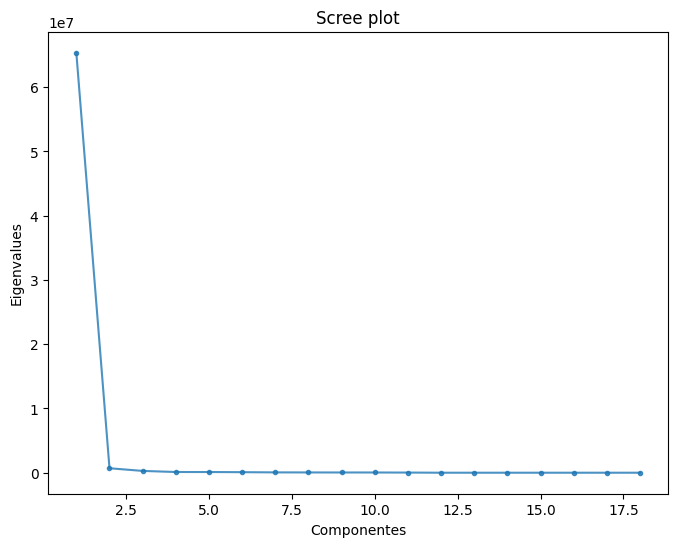

In [10]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

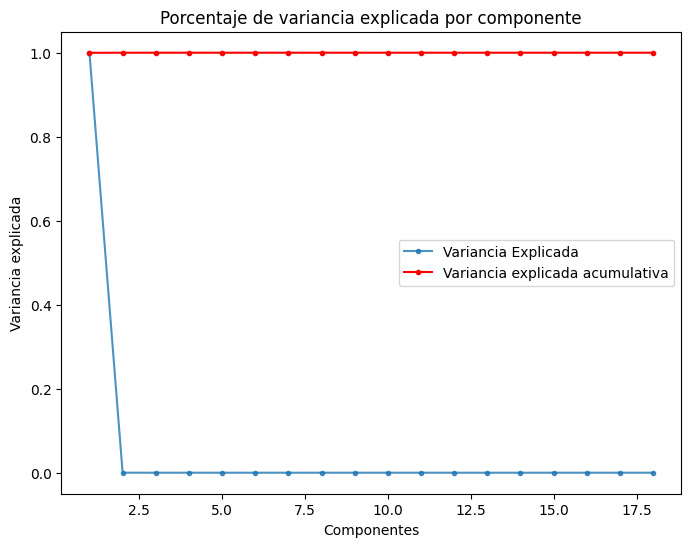

In [11]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

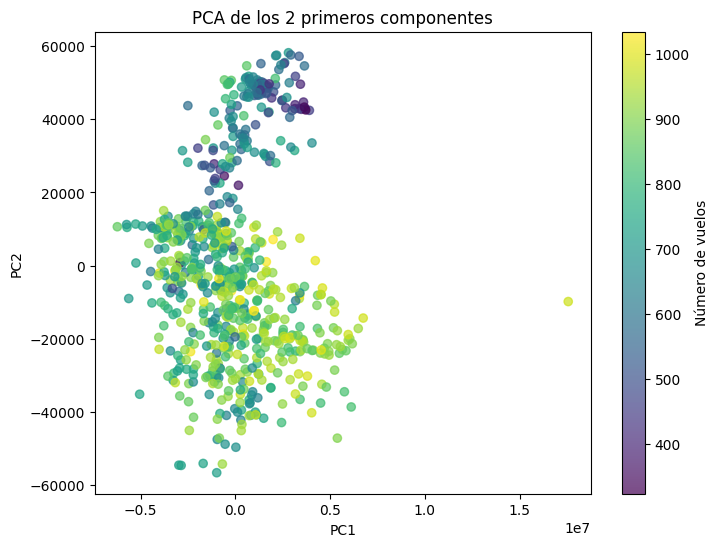

In [12]:
transformed_pca = myPCA.transform(X_train)


pca_data = pd.DataFrame({
    "PC1": transformed_pca[:, 0],
    "PC2": transformed_pca[:, 1],
    "n_vuelos": y_train  
})


plt.figure(figsize=(8, 6))
plt.title("PCA de los 2 primeros componentes")
sc = plt.scatter(
    x=pca_data["PC1"],
    y=pca_data["PC2"],
    c=pca_data["n_vuelos"],  
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(sc, label="Número de vuelos")  
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


c:\Users\Luca Acosta Iglesias\Documents\APA\P4\.env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


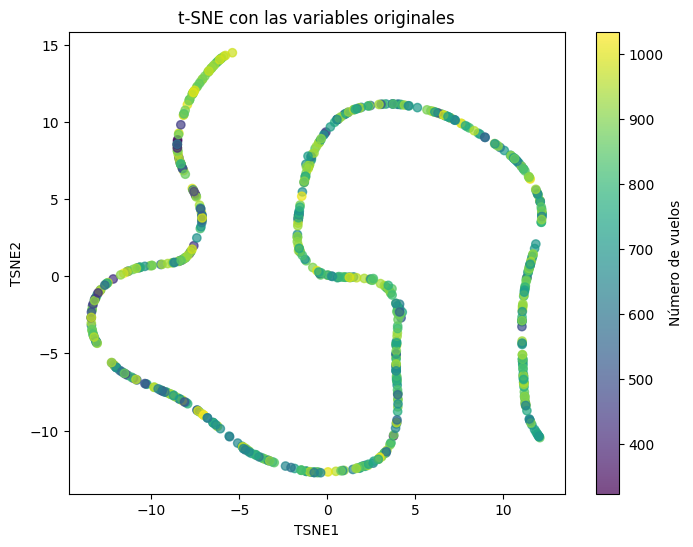

In [13]:
from sklearn.manifold import TSNE

data_tsne = pd.DataFrame(
    TSNE(n_components=2, perplexity=30, n_iter=300, init='random', random_state=42).fit_transform(X_train), 
    columns=['TSNE1', 'TSNE2']
)


fig = plt.figure(figsize=(8, 6))
plt.title("t-SNE con las variables originales")
sc = plt.scatter(
    x=data_tsne["TSNE1"],
    y=data_tsne["TSNE2"],
    c=y_train,  
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(sc, label="Número de vuelos")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()


In [14]:
train["AeronavesPrat-Aeronaves"] = np.log(train["AeronavesPrat-Aeronaves"])
test["AeronavesPrat-Aeronaves"] = np.log(test["AeronavesPrat-Aeronaves"])

X_train = train.drop(columns=["AeronavesPrat-Aeronaves"])
y_train = train["AeronavesPrat-Aeronaves"]
X_test = test.drop(columns=["AeronavesPrat-Aeronaves"])
y_test = test["AeronavesPrat-Aeronaves"]


In [15]:
import pandas as pd

results = pd.DataFrame()

def save_results(model_name, mseCV, mseTest, R2Train, R2Test):
    results.loc[model_name, "mse Train CV"] = -mseCV
    results.loc[model_name, "mse Test"] = mseTest
    results.loc[model_name, "R2 Train"] = R2Train
    results.loc[model_name, "R2 Test"] = R2Test

## APARTADO B

En este apartado veremos si la relacion entre las variables es simplemente lineal. Ajustaremos una regresion LASSO para comprobarlo

### LASSO

In [16]:
from sklearn.metrics import r2_score, mean_squared_error


def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [17]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

lasso_cv = LassoCV(alphas=lambdas, cv = 10).fit(X_train, y_train)

r2_lasso_train = lasso_cv.score(X_train, y_train)
mse_lasso_cv = np.mean(cross_val_score(lasso_cv, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_lasso_train, mse_lasso_cv))

Train R2 score: 0.7003510459922545
Cross-Validation MSE score: -0.014264547477357855


In [18]:
y_pred_lasso = lasso_cv.predict(X_test)

In [19]:
mseTest, r2Test = evaluate_model(y_test, y_pred_lasso)

save_results("Lasso", mse_lasso_cv, mseTest, r2_lasso_train, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343


In [20]:
lasso_coefficients = pd.Series(lasso_cv.coef_, index=X_train.columns)
print(lasso_coefficients)

Temperatura-Barcelona - Zona Universitària         7.537006e-03
Transito-Transito                                  0.000000e+00
VisitantesMunicipales-Badalona                     1.430574e-06
VisitantesMunicipales-L'Hospitalet de Llobregat   -5.809274e-06
VisitantesMunicipales-Sabadell                     8.913637e-06
VisitantesMunicipales-Santa Coloma de Gramenet    -1.607949e-06
VisitantesMunicipales-Terrassa                     1.195770e-05
VisitantesProvincia-Girona                         1.340874e-05
VisitantesProvincia-Illes Balears                 -4.286240e-06
VisitantesProvincia-Lleida                        -1.492121e-07
VisitantesProvincia-Madrid                         9.918880e-06
VisitantesProvincia-Tarragona                     -1.362054e-05
Electricidad-PrecioMW                             -1.066849e-04
Electricidad-Consumo                              -1.023566e-08
day                                               -5.329255e-04
dayofweek                               

## APARTADO C

In [21]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM LINEAL

In [22]:
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from skopt import BayesSearchCV


param = {'C':10**np.linspace(-3,3,101), 'epsilon':np.linspace(0,0.01,11)}

lsvr =  SVR(kernel='linear', max_iter=25000, cache_size=2000)
lsvr_gs = BayesSearchCV(lsvr,param,n_iter=15, 
                        cv=10, 
                        scoring="r2",
                        n_jobs=-1, 
                        refit=True, random_state=0)

lsvr_gs.fit(X_train_scaled, y_train)


r2_lsvr_gs = lsvr_gs.score(X_train_scaled, y_train)
mse_lsvr_gs_cv = np.mean(cross_val_score(lsvr_gs, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error'))

lsvr_gs.fit(X_train_scaled, y_train);

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_lsvr_gs, mse_lsvr_gs_cv))

c:\Users\Luca Acosta Iglesias\Documents\APA\P4\.env\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train R2 score: 0.6940575855648139
Cross-Validation MSE score: -0.014495387480089186


In [23]:
y_pred_lsvr_gs = lsvr_gs.predict(X_test_scaled)

In [24]:
mseTest, r2Test = evaluate_model(y_test, y_pred_lsvr_gs)

save_results("SVM Lineal", mse_lsvr_gs_cv, mseTest, r2_lsvr_gs, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255


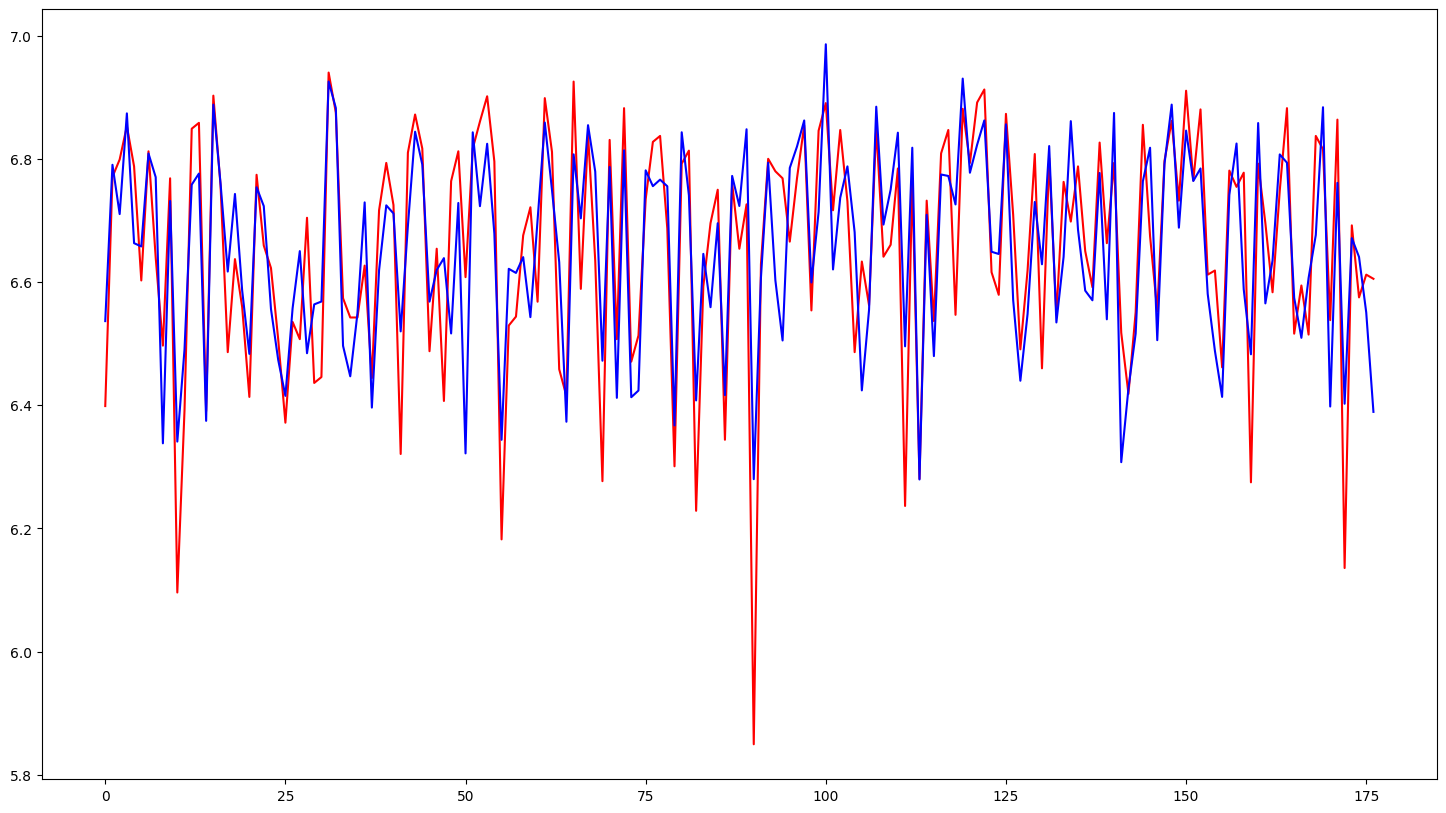

In [25]:
plt.figure(figsize=(18,10))
plt.plot(y_test.to_numpy(),'r');
plt.plot(lsvr_gs.predict(X_test_scaled),'b');

### SVM RBF

In [26]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbsvr =  SVR(kernel='rbf', max_iter=50000, cache_size=2000)
rbsvr_gs = BayesSearchCV(rbsvr,param,n_iter=15, 
                        cv=10, 
                        scoring="r2",
                        n_jobs=-1, 
                        refit=True, random_state=0)
rbsvr_gs.fit(X_train_scaled, y_train);

In [27]:
rbsvr_gs.fit(X_train_scaled, y_train)


r2_rbsvr_gs = rbsvr_gs.score(X_train_scaled, y_train)
mse_rbsvr_gs_cv = np.mean(cross_val_score(rbsvr_gs, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error'))

rbsvr_gs.fit(X_train_scaled, y_train);

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_rbsvr_gs, mse_rbsvr_gs_cv))

Train R2 score: 0.9484389257931146
Cross-Validation MSE score: -0.006509509895181151


In [28]:
y_pred_rbsvr_gs = rbsvr_gs.predict(X_test_scaled)

In [29]:
mseTest, r2Test = evaluate_model(y_test, y_pred_rbsvr_gs)

save_results("SVM RBF", mse_rbsvr_gs_cv, mseTest, r2_rbsvr_gs, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255
SVM RBF,0.006510,0.005614,0.948439,0.841175


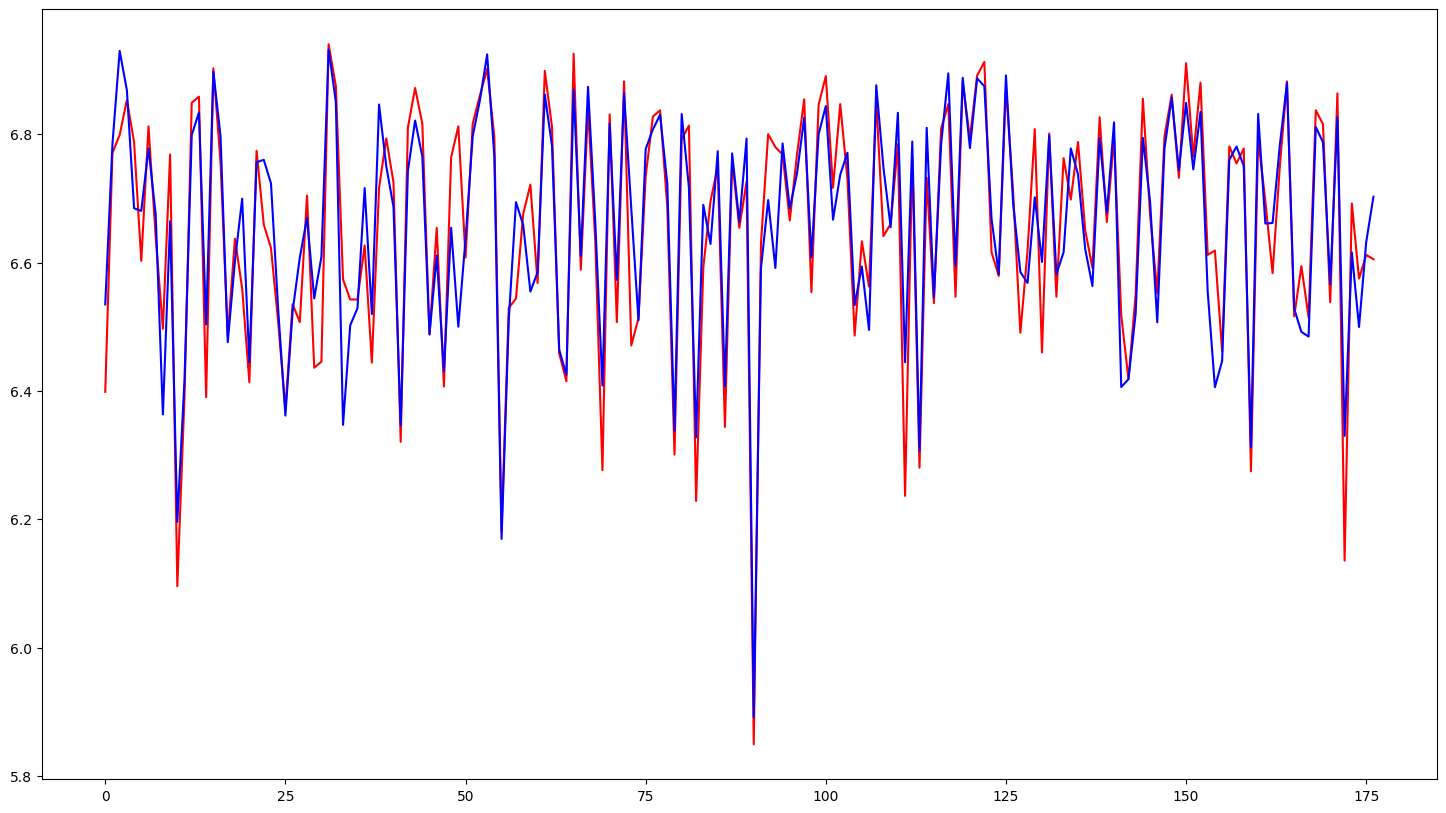

In [30]:
plt.figure(figsize=(18,10))
plt.plot(y_test.to_numpy(),'r');
plt.plot(rbsvr_gs.predict(X_test_scaled),'b');

## APARTADO D

### RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['squared_error', 'absolute_error', 'poisson', 'friedman_mse'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestRegressor(random_state=0)
rf_bs =  BayesSearchCV(rf,param,n_iter=15, cv=10, n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_train, y_train);


In [38]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
10,"{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}",0.822731,1
11,"{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}",0.819645,2
13,"{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 200}",0.816242,3
3,"{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 40}",0.813090,4
8,"{'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 200}",0.807631,5


In [39]:
r2_random_forest_train = rf_bs.score(X_train, y_train)
mse_random_forest_cv = np.mean(cross_val_score(rf_bs, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_random_forest_train, mse_random_forest_cv))

Train R2 score: 0.9703736561856596
Cross-Validation MSE score: -0.007883538982611564


In [40]:
y_pred_random_forest = rf_bs.predict(X_test)

In [41]:
mseTest, r2Test = evaluate_model(y_test, y_pred_random_forest)

save_results("Random Forest", mse_random_forest_cv, mseTest, r2_random_forest_train, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255
SVM RBF,0.006510,0.005614,0.948439,0.841175
Random Forest,0.007884,0.006071,0.970374,0.828240


### Gradient Boosting

In [44]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'loss':['absolute_error', 'quantile', 'huber', 'squared_error'], 
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10], 
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gb =  GradientBoostingRegressor(random_state=0,n_iter_no_change=5)
gb_bs =  BayesSearchCV(gb,param,n_iter=15, cv=10, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_train, y_train);

In [45]:
show_html(pd.DataFrame(gb_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 200}",0.849225,1
4,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 25}",0.816322,2
13,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 25}",0.798583,3
10,"{'criterion': 'squared_error', 'learning_rate': 1, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 200}",0.739023,4
2,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'quantile', 'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 25}",-0.548457,5


In [46]:
r2_gradient_boosting_train = gb_bs.score(X_train, y_train)
mse_gradient_boosting_cv = np.mean(cross_val_score(gb_bs, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_gradient_boosting_train, mse_gradient_boosting_cv))

Train R2 score: 0.9109166528358673
Cross-Validation MSE score: -0.00816429606795439


In [47]:
y_pred_gradient_boosting = gb_bs.predict(X_test)

In [48]:
mseTest, r2Test = evaluate_model(y_test, y_pred_gradient_boosting)

save_results("Gradient Boosting", mse_gradient_boosting_cv, mseTest, r2_gradient_boosting_train, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255
SVM RBF,0.006510,0.005614,0.948439,0.841175
Random Forest,0.007884,0.006071,0.970374,0.828240
Gradient Boosting,0.008164,0.005865,0.910917,0.834071


### PERMUTATION IMPORTANCE RANDOM FOREST

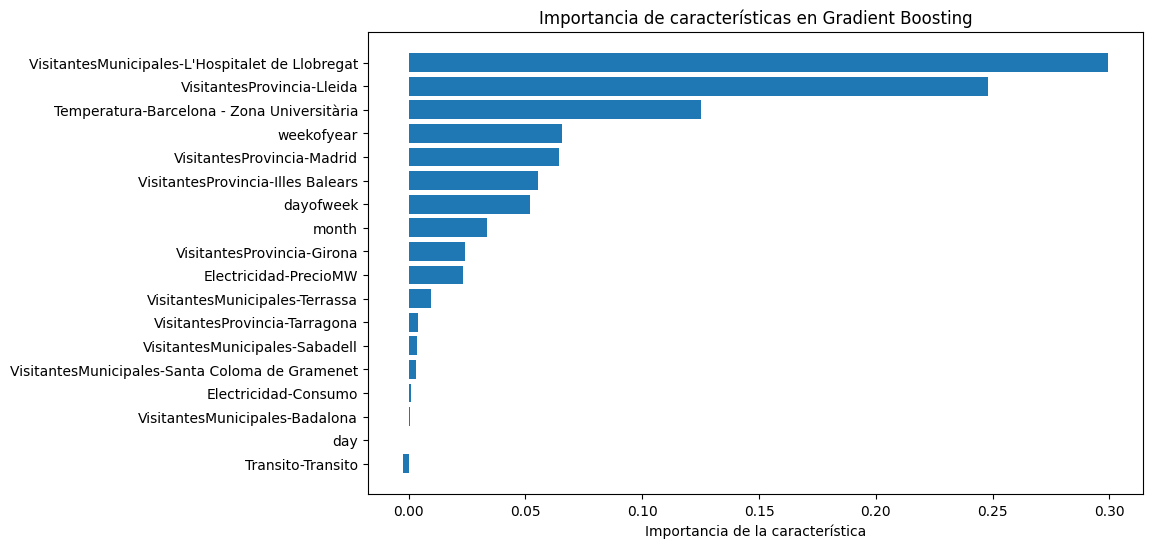

In [50]:
from sklearn.inspection import permutation_importance


# Importancia de las características usando permutation_importance
result = permutation_importance(rf_bs, X_test, y_test, n_repeats=10, random_state=42)

# Ordenar las características por importancia
importance = result.importances_mean
indices = np.argsort(importance)

# Mostrar la importancia de cada atributo
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), X_test.columns[indices])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de características en Gradient Boosting')
plt.show();

## APARTAD E

### StackRegressor

In [64]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

st1 = StackingRegressor([('randomForest', rf_bs),
                          ('gradientBoosting', gb_bs),
                          ('SVM RBF', rbsvr_gs)],
                          cv=5, n_jobs=-1)

print("DONE 1")
st1.fit(X_train_scaled, y_train);
print("DONE 2")
r2_st1_train = st1.score(X_train_scaled, y_train)
print("DONE 3")
mse_st1_cv = np.mean(cross_val_score(st1, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_st1_train, mse_st1_cv))

DONE 1


StackingRegressor(cv=5,
                  estimators=[('randomForest',
                               BayesSearchCV(cv=10,
                                             estimator=RandomForestRegressor(random_state=0),
                                             n_iter=15, n_jobs=-1,
                                             random_state=0,
                                             search_spaces={'criterion': ['squared_error',
                                                                          'absolute_error',
                                                                          'poisson',
                                                                          'friedman_mse'],
                                                            'max_depth': [None,
                                                                          1, 2,
                                                                          3, 5,
                                                                          8, 9,
                                                                          10,
                                                                          15],
                                                            'min_samples_leaf': [1,
                                                                                 2,
                                                                                 3,
                                                                                 5,
                                                                                 10],
                                                            'n_estimators': [5,
                                                                             10,
                                                                             25,
                                                                             40,
                                                                             50,
                                                                             75,
                                                                             100,
                                                                             200...
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                                                            'epsilon': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
                                                            'gamma': ['scale',
                                                                      'auto']}))],
                  n_jobs=-1)

DONE 2
DONE 3
Train R2 score: 0.958975338765144
Cross-Validation MSE score: -0.006361011742933501


In [65]:
y_pred_st1 = st1.predict(X_test_scaled)

In [72]:
mseTest, r2Test = evaluate_model(y_test, y_pred_st1)

save_results("Stacking", mse_st1_cv, mseTest, r2_st1_train, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255
SVM RBF,0.006510,0.005614,0.948439,0.841175
Random Forest,0.007884,0.006071,0.970374,0.828240
Gradient Boosting,0.008164,0.005865,0.910917,0.834071
Stacking,0.006361,0.004520,0.958975,0.872139


### Voting

In [69]:
vs1 = VotingRegressor([('randomForest', rf_bs),
                          ('gradientBoosting', gb_bs),
                          ('SVM RBF', rbsvr_gs)], n_jobs=-1)

print("DONE 1")
vs1.fit(X_train_scaled, y_train);
print("DONE 2")
r2_vs1_train = vs1.score(X_train_scaled, y_train)
print("DONE 3")
mse_vs1_cv = np.mean(cross_val_score(vs1, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))

print('Train R2 score: {}\nCross-Validation MSE score: {}'.format(r2_vs1_train, mse_vs1_cv))

DONE 1


VotingRegressor(estimators=[('randomForest',
                             BayesSearchCV(cv=10,
                                           estimator=RandomForestRegressor(random_state=0),
                                           n_iter=15, n_jobs=-1, random_state=0,
                                           search_spaces={'criterion': ['squared_error',
                                                                        'absolute_error',
                                                                        'poisson',
                                                                        'friedman_mse'],
                                                          'max_depth': [None, 1,
                                                                        2, 3, 5,
                                                                        8, 9,
                                                                        10,
                                                                        15],
                                                          'min_samples_leaf': [1,
                                                                               2,
                                                                               3,
                                                                               5,
                                                                               10],
                                                          'n_estimators': [5,
                                                                           10,
                                                                           25,
                                                                           40,
                                                                           50,
                                                                           75,
                                                                           100,
                                                                           200]})),
                            ('...
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                                                          'epsilon': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
                                                          'gamma': ['scale',
                                                                    'auto']}))],
                n_jobs=-1)

DONE 2
DONE 3
Train R2 score: 0.957354604741371
Cross-Validation MSE score: -0.006538922486046675


In [70]:
y_pred_vs1 = vs1.predict(X_test_scaled)

In [73]:
mseTest, r2Test = evaluate_model(y_test, y_pred_vs1)

save_results("Voting", mse_vs1_cv, mseTest, r2_vs1_train, r2Test)

results

,mse Train CV,mse Test,R2 Train,R2 Test
Lasso,0.014265,0.012572,0.700351,0.644343
SVM Lineal,0.014495,0.012363,0.694058,0.650255
SVM RBF,0.006510,0.005614,0.948439,0.841175
Random Forest,0.007884,0.006071,0.970374,0.828240
Gradient Boosting,0.008164,0.005865,0.910917,0.834071
Stacking,0.006361,0.004520,0.958975,0.872139
Voting,0.006539,0.004675,0.957355,0.867727
